In [1]:
import pandas as pd
pd.options.display.max_columns = 200
import numpy as np


def prettyTable(dataframe, column):
    z = pd.DataFrame(columns = [dataframe[column].value_counts(True).index, round(dataframe[column].value_counts(True) * 100, 2).astype(str) + '%', dataframe[column].value_counts()]).T
    return z

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loans_full_schema = pd.read_csv('loans_full_schema.csv')
# print(loans_full_schema['loan_status'].value_counts(dropna = False))
# loans_full_schema

In [4]:
# accepted_2007_to_2018Q4 = pd.read_csv('accepted_2007_to_2018Q4.csv', nrows = 10000)
# accepted_2007_to_2018Q4 = accepted_2007_to_2018Q4[sorted(accepted_2007_to_2018Q4.columns.tolist())]
# print(accepted_2007_to_2018Q4['loan_status'].value_counts(dropna = False))
# accepted_2007_to_2018Q4

## Cleaning and Initial EDA

In [5]:
cr_loan2 = pd.read_csv('cr_loan2.csv')
cr_loan2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [6]:
prettyTable(cr_loan2, 'loan_status')

,,
,loan_status,loan_status
0,78.18%,25473
1,21.82%,7108


In [7]:
df = cr_loan2.copy()
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [9]:
mean_pel = df[df['person_emp_length'].isna() != True]['person_emp_length'].mean()
mean_lir = df[df['loan_int_rate'].isna() != True]['loan_int_rate'].mean()

print(mean_pel)
print(mean_lir)

4.789686296787225
11.01169489224439


In [10]:
display(min(df['loan_int_rate']))
display(max(df['loan_int_rate']))

5.42

23.22

In [11]:
# replacing missing values with averages: interest rate, employment length

df['loan_int_rate'] = df['loan_int_rate'].fillna(mean_lir)
df['person_emp_length'] = df['person_emp_length'].fillna(mean_pel)

In [12]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [13]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [14]:
df.loan_grade.value_counts(True)

A    0.330776
B    0.320770
C    0.198214
D    0.111292
E    0.029588
F    0.007397
G    0.001964
Name: loan_grade, dtype: float64

In [15]:
df.cb_person_default_on_file.value_counts(True)

N    0.82367
Y    0.17633
Name: cb_person_default_on_file, dtype: float64

In [16]:
min(df.person_age)
max(df.person_age)

144

In [17]:
df[df.person_age > 75]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,11.011695,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.730000,0,0.00,N,25
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.510000,0,0.06,N,25
32416,94,24000,RENT,1.0,MEDICAL,C,6500,11.011695,0,0.27,N,27
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.710000,0,0.11,N,25
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.510000,0,0.11,N,24
32534,76,75000,RENT,23.0,MEDICAL,A,15000,8.940000,0,0.20,N,25


In [18]:
df = df[df.person_age <= 100]
len(df)

32576

In [19]:
len(df[df.loan_int_rate > 15])
# len(df[df.loan_int_rate < 10])

3441

In [20]:
df['int_group'] = np.where(df.loc[:, 'loan_int_rate'] < 10, 'under 10%', 
                           (np.where((df.loc[:, 'loan_int_rate'] >= 10) & (df.loc[:, 'loan_int_rate'] <= 15), '10% - 15%', 'over 15%')))


prettyTable(df, 'int_group')


,,
,int_group,int_group
10% - 15%,54.17%,17647
under 10%,35.27%,11488
over 15%,10.56%,3441


In [21]:
df['age_group'] = np.where(df['person_age'] <25, 'under 25', 
                           (np.where((df['person_age'] >= 25) & (df['person_age'] <35), '25 - 35', 'over 35')))


prettyTable(df, 'age_group')


,,
,age_group,age_group
25 - 35,49.67%,16180
under 25,37.8%,12315
over 35,12.53%,4081


In [22]:
df['risk_group'] = np.where((df['loan_grade'] == 'A') | (df['loan_grade'] == 'B'), 'low risk', 
                           (np.where((df['loan_grade'] == 'C') | (df['loan_grade'] == 'D'), 'medium risk', 'high risk')))


prettyTable(df, 'risk_group')


,,
,risk_group,risk_group
low risk,65.16%,21225
medium risk,30.95%,10082
high risk,3.9%,1269


In [23]:
df.person_income.max()

df[df['person_income'] == df.person_income.max()]
df[df['person_income'] == df.person_income.min()]


df['income_group'] = np.where((df['person_income'] < 65000), 'under 65k', 
                           (np.where((df['person_income'] >= 65000) & (df['person_income'] <= 125000), '65k - 125k', '> 125k')))


prettyTable(df, 'income_group')


,,
,income_group,income_group
under 65k,61.13%,19913
65k - 125k,32.33%,10531
> 125k,6.54%,2132


In [24]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,over 15%,under 25,medium risk,under 65k
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10% - 15%,under 25,low risk,under 65k
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,10% - 15%,25 - 35,medium risk,under 65k
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,over 15%,under 25,medium risk,65k - 125k
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,10% - 15%,under 25,medium risk,under 65k


In [25]:
prettyTable(df, 'loan_intent')

,,
,loan_intent,loan_intent
EDUCATION,19.8%,6451
MEDICAL,18.64%,6071
VENTURE,17.55%,5717
PERSONAL,16.94%,5520
DEBTCONSOLIDATION,16.0%,5212
HOMEIMPROVEMENT,11.07%,3605


In [26]:
prettyTable(df, 'loan_grade')

,,
,loan_grade,loan_grade
A,33.08%,10777
B,32.07%,10448
C,19.82%,6456
D,11.13%,3626
E,2.96%,964
F,0.74%,241
G,0.2%,64


In [27]:
prettyTable(df, 'person_home_ownership')

,,
,person_home_ownership,person_home_ownership
RENT,50.48%,16443
MORTGAGE,41.26%,13442
OWN,7.93%,2584
OTHER,0.33%,107


In [28]:
min(df['person_emp_length'])
max(df['person_emp_length'])

123.0

In [29]:
df = df[df['person_emp_length'] < 50]
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10% - 15%,under 25,low risk,under 65k
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,10% - 15%,25 - 35,medium risk,under 65k
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,over 15%,under 25,medium risk,65k - 125k
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,10% - 15%,under 25,medium risk,under 65k
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,under 10%,under 25,low risk,under 65k


In [30]:
min(df['loan_amnt'])
max(df['loan_amnt'])

35000

In [31]:
df['loan_size'] = np.where((df['loan_amnt'] < 10000), 'under 10k', 
                           (np.where((df['loan_amnt'] >= 10000) & (df['loan_amnt'] < 20000), '10k - 20k', '> 20k')))


prettyTable(df, 'loan_size')


,,
,loan_size,loan_size
under 10k,57.91%,18862
10k - 20k,32.42%,10560
> 20k,9.68%,3152


In [32]:
df.loan_percent_income.min()
df.loan_percent_income.max()

0.83

In [33]:
df[df.loan_percent_income == df.loan_percent_income.max()]
df[df.loan_percent_income >= .8]
df[df.loan_percent_income == df.loan_percent_income.min()]
df[df.loan_percent_income == df.loan_percent_income.median()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size
59,24,12000,OWN,2.0,VENTURE,E,1750,11.011695,0,0.15,Y,3,10% - 15%,under 25,high risk,under 65k,under 10k
103,25,230000,MORTGAGE,5.0,MEDICAL,C,35000,13.990000,0,0.15,N,4,10% - 15%,25 - 35,medium risk,> 125k,> 20k
250,22,14400,OWN,0.0,PERSONAL,B,2100,11.140000,0,0.15,N,4,10% - 15%,under 25,low risk,under 65k,under 10k
301,25,162000,MORTGAGE,5.0,DEBTCONSOLIDATION,E,25000,16.000000,1,0.15,Y,3,over 15%,25 - 35,high risk,> 125k,> 20k
349,25,165000,MORTGAGE,0.0,HOMEIMPROVEMENT,F,25000,19.740000,0,0.15,N,4,over 15%,25 - 35,high risk,> 125k,> 20k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32541,52,163000,MORTGAGE,9.0,PERSONAL,D,25000,14.110000,1,0.15,N,30,10% - 15%,over 35,medium risk,> 125k,> 20k
32554,60,98000,RENT,1.0,HOMEIMPROVEMENT,D,15000,16.290000,1,0.15,N,29,over 15%,over 35,medium risk,65k - 125k,10k - 20k
32562,61,160000,MORTGAGE,30.0,PERSONAL,B,24000,10.380000,0,0.15,N,21,10% - 15%,over 35,low risk,> 125k,> 20k
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.490000,0,0.15,N,19,under 10%,over 35,low risk,65k - 125k,10k - 20k


In [34]:
df['loan_to_income_grouping'] = np.where((df['loan_percent_income'] < .1), 'under 10%', 
                           (np.where((df['loan_percent_income'] >= .1) & (df['loan_percent_income'] < .25), '10% - 25%', '> 25%')))


prettyTable(df, 'loan_to_income_grouping')


,,
,loan_to_income_grouping,loan_to_income_grouping
10% - 25%,51.04%,16626
under 10%,27.47%,8948
> 25%,21.49%,7000


## EDA and Visuals

In [35]:
# can use of crosstab make this analysis easier?

In [36]:
# groupings of diff categories by loan status
# hist of income, emp length

# loan status by age, by income level, by home ownnership
# by int rate amt, by loan amt

In [37]:
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size,loan_to_income_grouping
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10% - 15%,under 25,low risk,under 65k,under 10k,10% - 25%
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,10% - 15%,25 - 35,medium risk,under 65k,under 10k,> 25%
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,over 15%,under 25,medium risk,65k - 125k,> 20k,> 25%


In [38]:
prettyTable(df, 'loan_status')

,,
,loan_status,loan_status
0,78.18%,25467
1,21.82%,7107


##### Income Group

In [39]:
df['income_group'].groupby(df.loan_status).value_counts(True)

loan_status  income_group
0            under 65k       0.559901
             65k - 125k      0.364668
             > 125k          0.075431
1            under 65k       0.795413
             65k - 125k      0.175039
             > 125k          0.029548
Name: income_group, dtype: float64

In [40]:
df['loan_status'].groupby(df.income_group).value_counts(True)

income_group  loan_status
65k - 125k    0              0.881873
              1              0.118127
> 125k        0              0.901455
              1              0.098545
under 65k     0              0.716101
              1              0.283899
Name: loan_status, dtype: float64

##### Age Group

In [41]:
df['age_group'].groupby(df.loan_status).value_counts(True)

loan_status  age_group
0            25 - 35      0.502101
             under 25     0.371226
             over 35      0.126674
1            25 - 35      0.477417
             under 25     0.402279
             over 35      0.120304
Name: age_group, dtype: float64

In [42]:
df['loan_status'].groupby(df.age_group).value_counts(True)

age_group  loan_status
25 - 35    0              0.790297
           1              0.209703
over 35    0              0.790493
           1              0.209507
under 25   0              0.767806
           1              0.232194
Name: loan_status, dtype: float64

##### Home Ownership

In [43]:
df['person_home_ownership'].groupby(df.loan_status).value_counts(True)

loan_status  person_home_ownership
0            MORTGAGE                 0.461421
             RENT                     0.441787
             OWN                      0.093886
             OTHER                    0.002906
1            RENT                     0.730407
             MORTGAGE                 0.237794
             OWN                      0.027156
             OTHER                    0.004643
Name: person_home_ownership, dtype: float64

In [44]:
df['loan_status'].groupby(df.person_home_ownership).value_counts(True)

person_home_ownership  loan_status
MORTGAGE               0              0.874265
                       1              0.125735
OTHER                  0              0.691589
                       1              0.308411
OWN                    0              0.925310
                       1              0.074690
RENT                   0              0.684284
                       1              0.315716
Name: loan_status, dtype: float64

##### Loan Intent

In [45]:
df['loan_intent'].groupby(df.loan_status).value_counts(True)

loan_status  loan_intent      
0            EDUCATION            0.209683
             VENTURE              0.191189
             MEDICAL              0.174736
             PERSONAL             0.173636
             DEBTCONSOLIDATION    0.146150
             HOMEIMPROVEMENT      0.104606
1            MEDICAL              0.228085
             DEBTCONSOLIDATION    0.209652
             EDUCATION            0.156325
             PERSONAL             0.154355
             HOMEIMPROVEMENT      0.132405
             VENTURE              0.119178
Name: loan_intent, dtype: float64

In [46]:
df['loan_status'].groupby(df.loan_intent).value_counts(True)

loan_intent        loan_status
DEBTCONSOLIDATION  0              0.714121
                   1              0.285879
EDUCATION          0              0.827779
                   1              0.172221
HOMEIMPROVEMENT    0              0.738974
                   1              0.261026
MEDICAL            0              0.732993
                   1              0.267007
PERSONAL           0              0.801232
                   1              0.198768
VENTURE            0              0.851819
                   1              0.148181
Name: loan_status, dtype: float64

##### Loan Grade

In [47]:
df['loan_grade'].groupby(df.loan_status).value_counts(True)

loan_status  loan_grade
0            A             0.381003
             B             0.343464
             C             0.200927
             D             0.058311
             E             0.013468
             F             0.002788
             G             0.000039
1            D             0.301112
             B             0.239341
             C             0.188406
             A             0.150978
             E             0.087379
             F             0.023920
             G             0.008864
Name: loan_grade, dtype: float64

In [48]:
df['loan_status'].groupby(df.loan_grade).value_counts(True)

loan_grade  loan_status
A           0              0.900427
            1              0.099573
B           0              0.837194
            1              0.162806
C           0              0.792596
            1              0.207404
D           1              0.590345
            0              0.409655
E           1              0.644191
            0              0.355809
F           1              0.705394
            0              0.294606
G           1              0.984375
            0              0.015625
Name: loan_status, dtype: float64

##### Loan Size

In [49]:
df['loan_size'].groupby(df.loan_status).value_counts(True)

loan_status  loan_size
0            under 10k    0.599364
             10k - 20k    0.318569
             > 20k        0.082067
1            under 10k    0.506261
             10k - 20k    0.344308
             > 20k        0.149430
Name: loan_size, dtype: float64

In [50]:
df['loan_status'].groupby(df.loan_size).value_counts(True)

loan_size  loan_status
10k - 20k  0              0.768277
           1              0.231723
> 20k      0              0.663071
           1              0.336929
under 10k  0              0.809246
           1              0.190754
Name: loan_status, dtype: float64

In [51]:
df['loan_size'].groupby(df.age_group).value_counts(True)

age_group  loan_size
25 - 35    under 10k    0.560136
           10k - 20k    0.332880
           > 20k        0.106984
over 35    under 10k    0.561137
           10k - 20k    0.322715
           > 20k        0.116148
under 25   under 10k    0.609843
           10k - 20k    0.313246
           > 20k        0.076911
Name: loan_size, dtype: float64

In [52]:
df['age_group'].groupby(df.loan_size).value_counts(True)

loan_size  age_group
10k - 20k  25 - 35      0.510038
           under 25     0.365246
           over 35      0.124716
> 20k      25 - 35      0.549175
           under 25     0.300444
           over 35      0.150381
under 10k  25 - 35      0.480490
           under 25     0.398102
           over 35      0.121408
Name: age_group, dtype: float64

##### Interest Rate Risk

In [53]:
df['int_group'].groupby(df.loan_status).value_counts(True)

loan_status  int_group
0            10% - 15%    0.540935
             under 10%    0.402325
             over 15%     0.056740
1            10% - 15%    0.544674
             over 15%     0.280709
             under 10%    0.174617
Name: int_group, dtype: float64

In [54]:
df['loan_status'].groupby(df.int_group).value_counts(True)

int_group  loan_status
10% - 15%  0              0.780643
           1              0.219357
over 15%   1              0.579942
           0              0.420058
under 10%  0              0.891965
           1              0.108035
Name: loan_status, dtype: float64

##### Risk Ratings / Loan Grade

In [55]:
df['risk_group'].groupby(df.loan_status).value_counts(True)

loan_status  risk_group 
0            low risk       0.724467
             medium risk    0.259237
             high risk      0.016296
1            medium risk    0.489517
             low risk       0.390319
             high risk      0.120163
Name: risk_group, dtype: float64

In [56]:
df['loan_status'].groupby(df.risk_group).value_counts(True)

risk_group   loan_status
high risk    1              0.672971
             0              0.327029
low risk     0              0.869299
             1              0.130701
medium risk  0              0.654895
             1              0.345105
Name: loan_status, dtype: float64

##### Income Groups

In [57]:
df['income_group'].groupby(df.loan_status).value_counts(True)

loan_status  income_group
0            under 65k       0.559901
             65k - 125k      0.364668
             > 125k          0.075431
1            under 65k       0.795413
             65k - 125k      0.175039
             > 125k          0.029548
Name: income_group, dtype: float64

In [58]:
df['loan_status'].groupby(df.income_group).value_counts(True)

income_group  loan_status
65k - 125k    0              0.881873
              1              0.118127
> 125k        0              0.901455
              1              0.098545
under 65k     0              0.716101
              1              0.283899
Name: loan_status, dtype: float64

##### Loan to Income Ratio

In [59]:
df['loan_to_income_grouping'].groupby(df.loan_status).value_counts(True)

loan_status  loan_to_income_grouping
0            10% - 25%                  0.549967
             under 10%                  0.310794
             > 25%                      0.139239
1            > 25%                      0.486000
             10% - 25%                  0.368651
             under 10%                  0.145350
Name: loan_to_income_grouping, dtype: float64

In [60]:
df['loan_status'].groupby(df.loan_to_income_grouping).value_counts(True)

loan_to_income_grouping  loan_status
10% - 25%                0              0.842415
                         1              0.157585
> 25%                    0              0.506571
                         1              0.493429
under 10%                0              0.884555
                         1              0.115445
Name: loan_status, dtype: float64

In [61]:
df['loan_to_income_grouping'].groupby(df.age_group).value_counts(True)

age_group  loan_to_income_grouping
25 - 35    10% - 25%                  0.507046
           under 10%                  0.289802
           > 25%                      0.203152
over 35    10% - 25%                  0.502818
           under 10%                  0.292820
           > 25%                      0.204362
under 25   10% - 25%                  0.517339
           under 10%                  0.248843
           > 25%                      0.233818
Name: loan_to_income_grouping, dtype: float64

In [62]:
df['age_group'].groupby(df.loan_to_income_grouping).value_counts(True)

loan_to_income_grouping  age_group
10% - 25%                25 - 35      0.493444
                         under 25     0.383135
                         over 35      0.123421
> 25%                    25 - 35      0.469571
                         under 25     0.411286
                         over 35      0.119143
under 10%                25 - 35      0.524028
                         under 25     0.342423
                         over 35      0.133549
Name: age_group, dtype: float64

### Summarizing the relationships between Loan Status and independent variables

**The lower two income groups see higher rates of default, and make up a greater share of the defaults. In particular, the under 65k group sees a much higher level of risk**

    * 80% of all defaults are within the under 65k group
    * 28% of the under 65k group defaulted

**73% of all defaults were in the Rent category (50% of records were renters)**

**The Other category and Rent category have a 31% default rate**

**Medical and Debt Consolidation make up the highest portions of defaults at 23% and 21% respectively. Debt Consolidation also has the highest Default rate among the Loan Intent categories. This makes sense given that debt consolidtion often takes place among those in difficult financial situations.**

**30% of all defaults were grade D, and 24% were grade B. C and D together make up roughly half of all defaults. Grades D, E, F, and G all had default rates of 59% or higher. This makes sense since lower grades equate to higher risk. Higher default rates are expected within these groups. Conversely, grades A, B, and C see default rates of 10%, 16%, and 21% respectively.**

**The larger the loan amount, the higher the rate of default. A higher borrowing value means higher payments and therefore higher risk for the borrower.**

**When looking at loan to income ratios, loans that were greater than 25% of income had a 50% default rate. Roughly half of all defaults came form the greater than 25% group.**

**The lower the income, the higher the default rate.**

**The higher the interest rate, the higher the default rate.**

### Visualizations

In [63]:
# income group and loan status
# income amount and loan status
# interest rate and loan status

# hist of age group, income group

# loan status with interest rate risk, legend = loan grade

# loan to income ratio with interest rate risk, legend = loan status

# box plot of loan size

# income group with loan size or loan to income ratio, legend = loan status

# save the images down for write-up?

# hue = ownership type

# hue = risk group (grade, int rate, age group, loan nto income ratio, income group, int rate group)

In [64]:
sns.set(rc={'figure.figsize':(15,8.27)})

<AxesSubplot:xlabel='loan_int_rate', ylabel='person_income'>

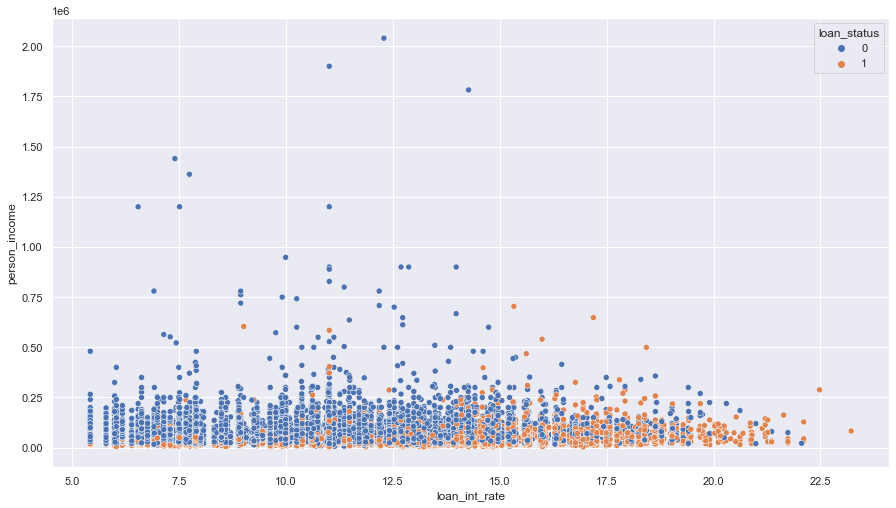

In [65]:
sns.scatterplot(x = df['loan_int_rate'], y = df['person_income'], hue = df['loan_status'])

<AxesSubplot:xlabel='loan_int_rate', ylabel='loan_to_income_grouping'>

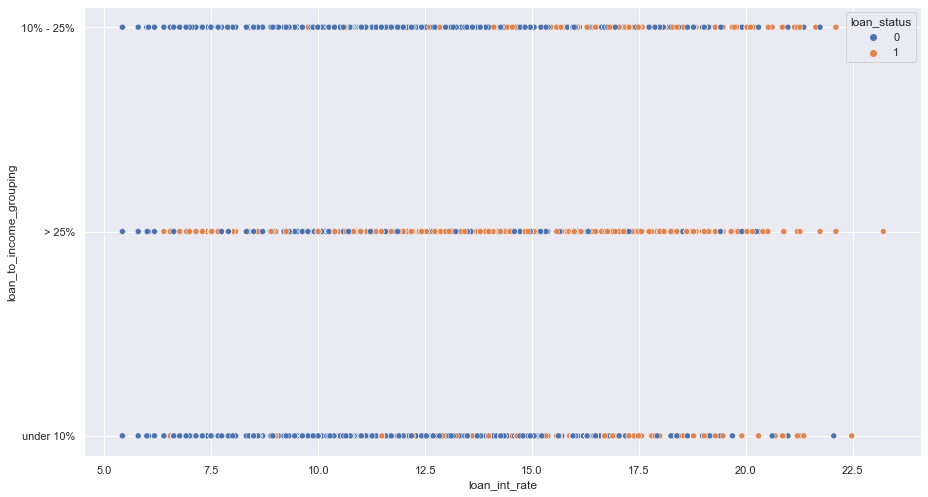

In [66]:
sns.scatterplot(x = df['loan_int_rate'], y = df['loan_to_income_grouping'], hue = df['loan_status'])


# loan_to_income_grouping
# income_group
# int_group

In [67]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size,loan_to_income_grouping
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10% - 15%,under 25,low risk,under 65k,under 10k,10% - 25%
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,10% - 15%,25 - 35,medium risk,under 65k,under 10k,> 25%
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,over 15%,under 25,medium risk,65k - 125k,> 20k,> 25%
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,10% - 15%,under 25,medium risk,under 65k,> 20k,> 25%
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,under 10%,under 25,low risk,under 65k,under 10k,> 25%


<AxesSubplot:xlabel='loan_int_rate', ylabel='loan_grade'>

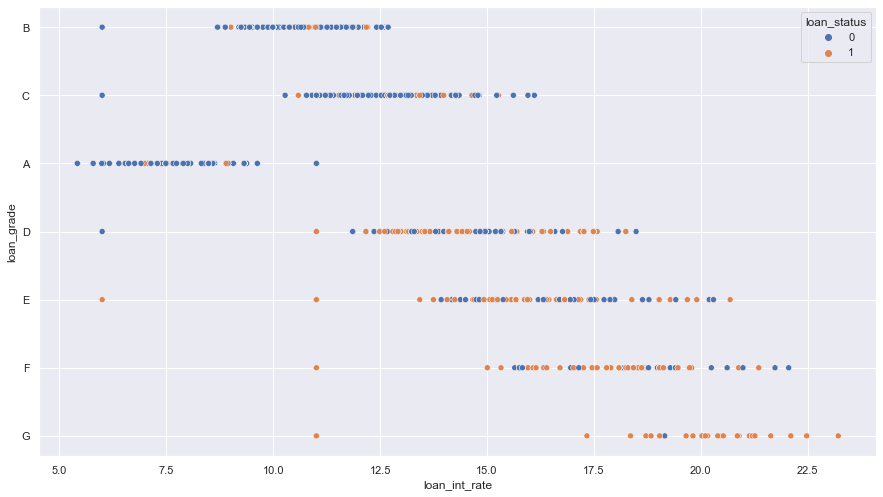

In [68]:
sns.scatterplot(x = df['loan_int_rate'], y = df['loan_grade'], hue = df['loan_status'])

<AxesSubplot:xlabel='loan_percent_income', ylabel='person_income'>

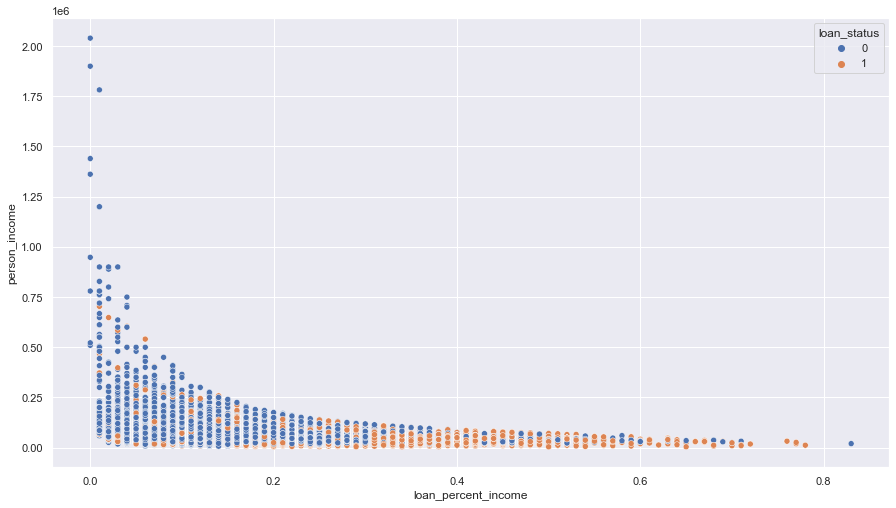

In [69]:
sns.scatterplot(x = df['loan_percent_income'], y = df['person_income'], hue = df['loan_status'])


# loan_to_income_grouping
# income_group
# int_group

<AxesSubplot:xlabel='loan_percent_income', ylabel='person_income'>

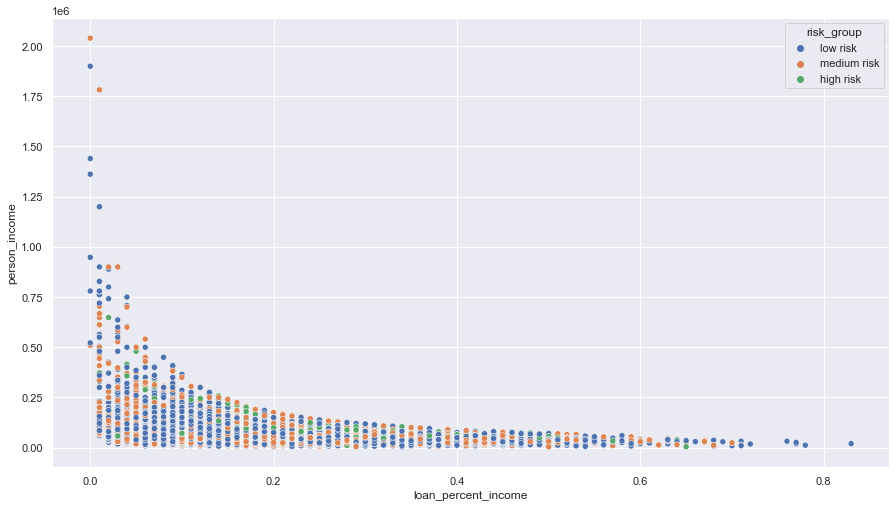

In [70]:
sns.scatterplot(x = df['loan_percent_income'], y = df['person_income'], hue = df['risk_group'])


# loan_to_income_grouping
# income_group
# int_group

<AxesSubplot:xlabel='loan_percent_income', ylabel='person_income'>

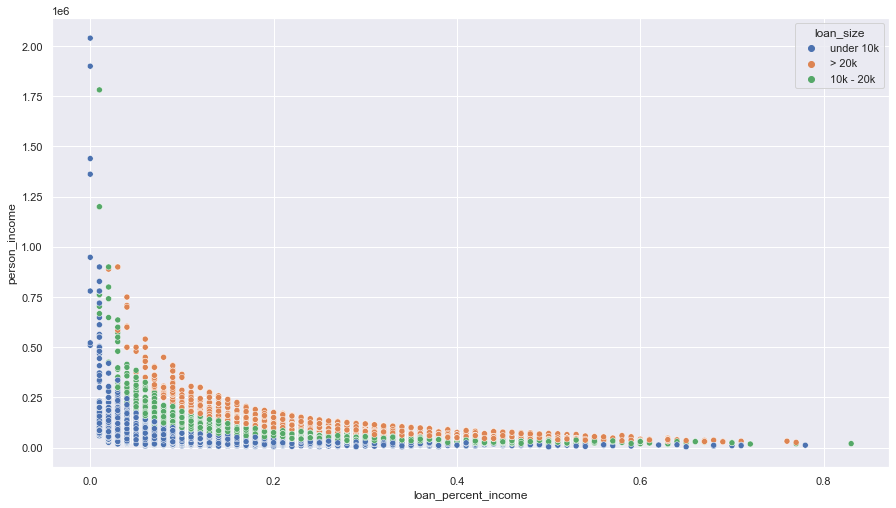

In [71]:
sns.scatterplot(x = df['loan_percent_income'], y = df['person_income'], hue = df['loan_size'])


# loan_to_income_grouping
# income_group
# int_group

<AxesSubplot:xlabel='loan_percent_income', ylabel='person_income'>

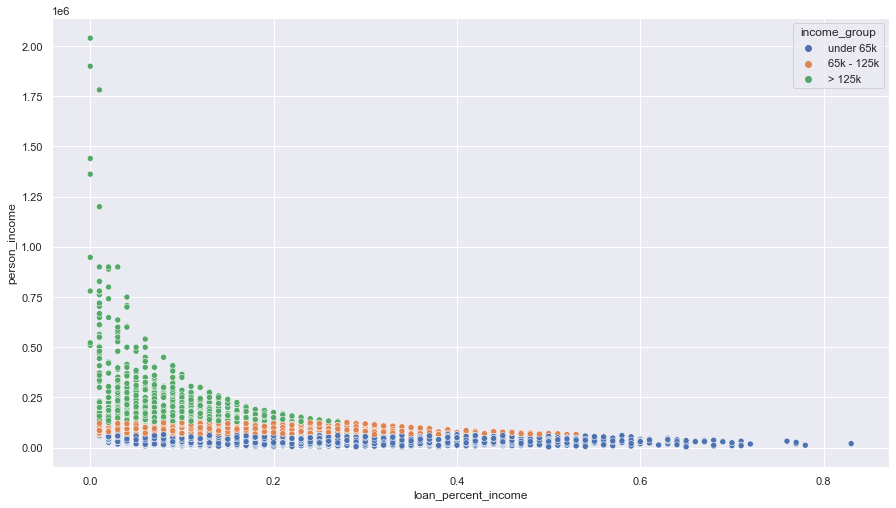

In [72]:
sns.scatterplot(x = df['loan_percent_income'], y = df['person_income'], hue = df['income_group'])


# loan_to_income_grouping
# income_group
# int_group

<AxesSubplot:xlabel='loan_int_rate', ylabel='loan_amnt'>

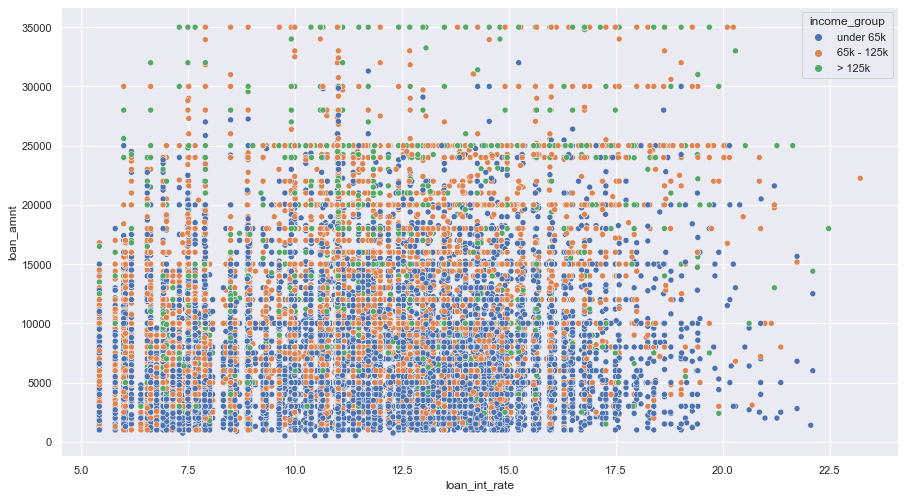

In [73]:
sns.scatterplot(x = df['loan_int_rate'], y = df['loan_amnt'], hue = df['income_group'])


# loan_to_income_grouping
# income_group
# int_group

<AxesSubplot:xlabel='loan_int_rate', ylabel='loan_amnt'>

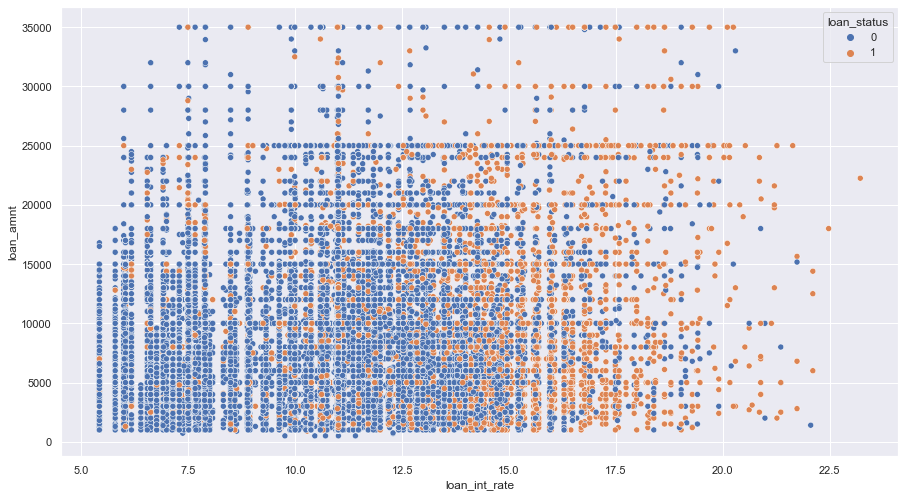

In [74]:
sns.scatterplot(x = df['loan_int_rate'], y = df['loan_amnt'], hue = df['loan_status'])


# loan_to_income_grouping
# income_group
# int_group

<AxesSubplot:xlabel='loan_percent_income', ylabel='loan_amnt'>

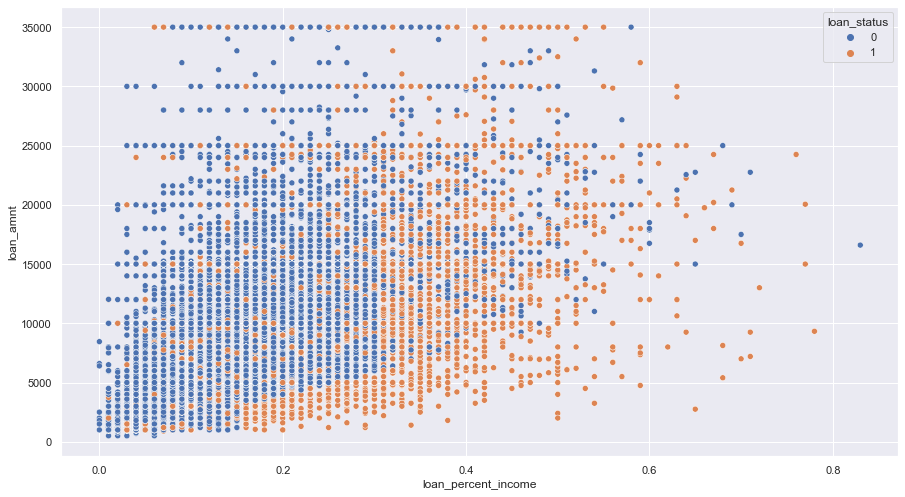

In [75]:
sns.scatterplot(x = df['loan_percent_income'], y = df['loan_amnt'], hue = df['loan_status'])


# loan_to_income_grouping
# income_group
# int_group

<AxesSubplot:xlabel='loan_percent_income', ylabel='loan_int_rate'>

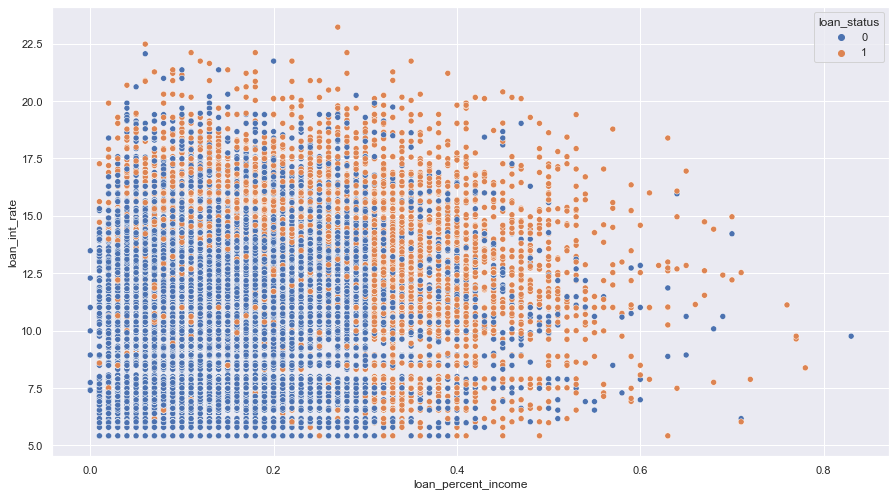

In [76]:
sns.scatterplot(x = df['loan_percent_income'], y = df['loan_int_rate'], hue = df['loan_status'])


# loan_to_income_grouping
# income_group
# int_group

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_int_rate'>

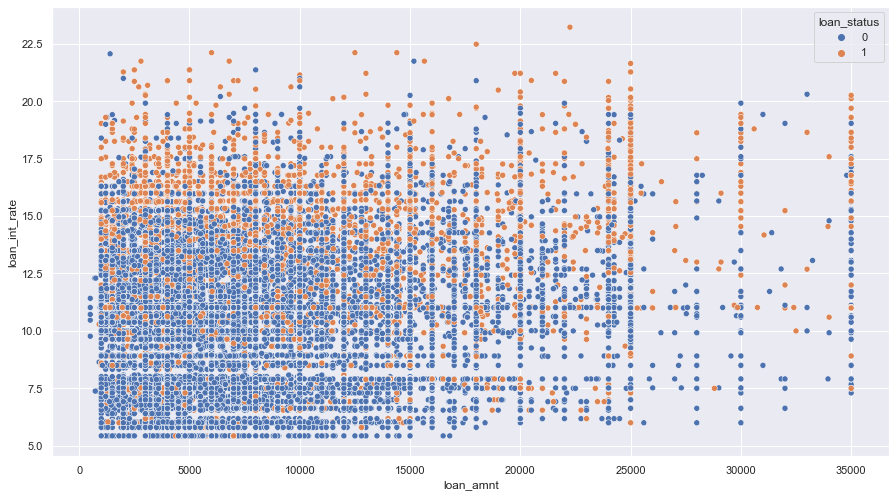

In [77]:
sns.scatterplot(x = df['loan_amnt'], y = df['loan_int_rate'], hue = df['loan_status'])


# loan_to_income_grouping
# income_group
# int_group

<AxesSubplot:xlabel='loan_amnt', ylabel='person_income'>

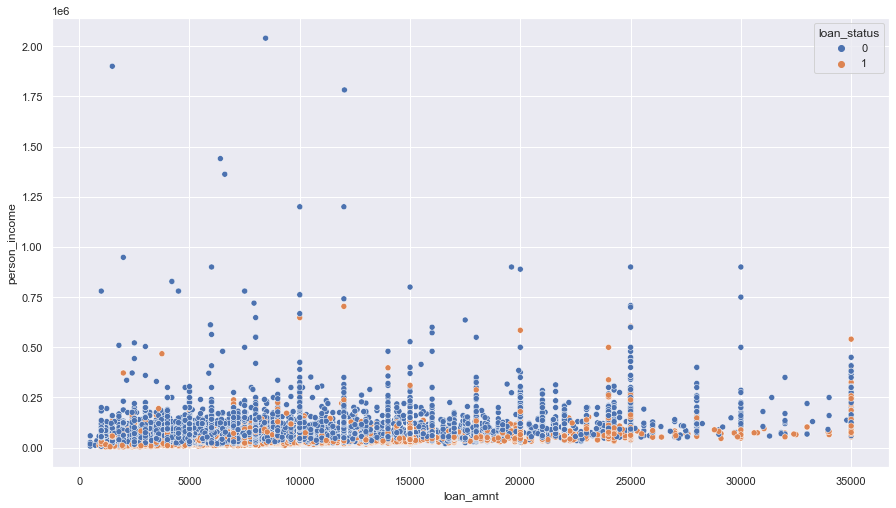

In [78]:
sns.scatterplot(x = df['loan_amnt'], y = df['person_income'], hue = df['loan_status'])


# loan_to_income_grouping
# income_group
# int_group

In [79]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size,loan_to_income_grouping
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10% - 15%,under 25,low risk,under 65k,under 10k,10% - 25%
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,10% - 15%,25 - 35,medium risk,under 65k,under 10k,> 25%
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,over 15%,under 25,medium risk,65k - 125k,> 20k,> 25%
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,10% - 15%,under 25,medium risk,under 65k,> 20k,> 25%
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,under 10%,under 25,low risk,under 65k,under 10k,> 25%


<AxesSubplot:>

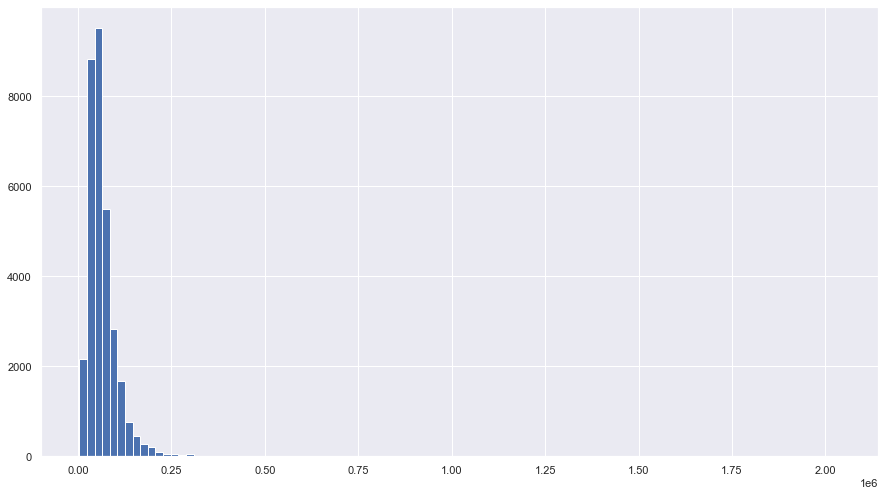

In [80]:
df.person_income.hist(bins = 100)

<AxesSubplot:>

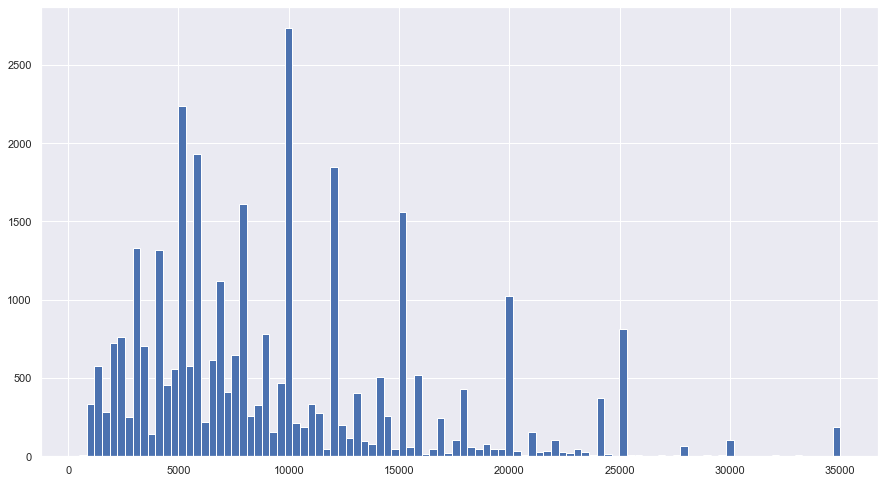

In [81]:
df.loan_amnt.hist(bins = 100)

In [82]:
df['loan_percent_income'].max()

0.83

<AxesSubplot:>

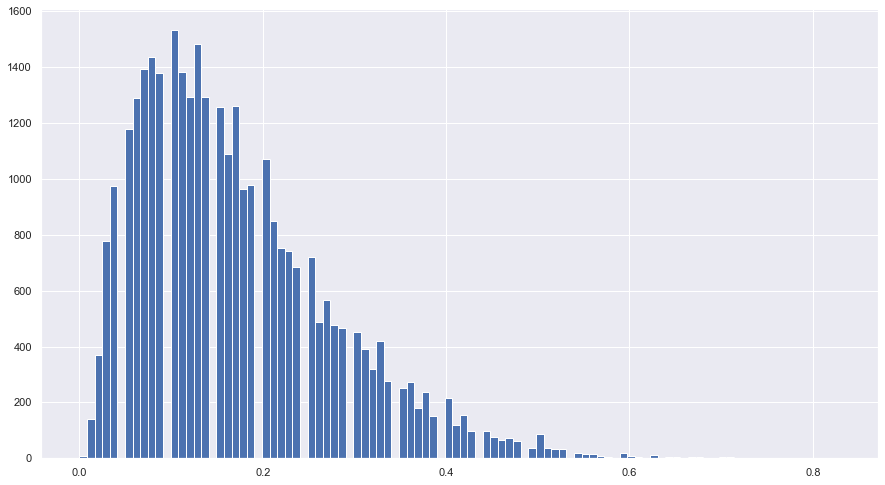

In [83]:
df.loan_percent_income.hist(bins = 100)

In [84]:
# come back to viz

## Can we segment the data to isolate defaults before we get to ML?

In [85]:
len(df[df['loan_status'] == 1])

7107

In [86]:
len(df[(df['loan_status'] == 1) & (df['person_home_ownership'] == 'RENT')])

5191

In [87]:
len(df[(df['loan_status'] == 1) & (df['loan_grade'] != 'A')])

6034

**A baseline rule can be to reject all loans that aren't Grade A.**

In [88]:
len(df[(df['loan_status'] == 1) & (df['loan_grade'] != 'A') & (df['person_home_ownership'] == 'RENT')])

4426

In [89]:
len(df[(df['loan_status'] == 1) & (df['loan_grade'] != 'A') & (df['person_home_ownership'] != 'MORTGAGE')])

4583

In [90]:
len(df[(df['loan_status'] == 1) & (df['loan_grade'] != 'A') & (df['person_home_ownership'] == 'MORTGAGE')])

1451

In [91]:
len(df[(df['loan_status'] == 1) & (df['loan_amnt'] > 2000) & (df['person_home_ownership'] == 'RENT')])

4934

In [92]:
len(df[(df['loan_status'] == 1) & (df['loan_amnt'] > 2000) & (df['loan_grade'] != 'A')])

5745

In [93]:
print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 10) & (df['loan_grade'] != 'A')]))


print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 7)]))

5734
6813


**Basline rule: reject all loans with Interest Rate greater than 7%**

In [94]:
print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 10) & (df['loan_grade'] != 'A')]))


print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 5) & (df['loan_grade'] != 'A')]))

5734
6034


In [95]:
print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 5) & (df['loan_percent_income'] >= 0.1)]))

print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 5) & (df['loan_percent_income'] >= 0.07)]))

print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 5) & (df['loan_percent_income'] >= 0.07) & (df['person_age'] >= 25)]))

6074
6612
3931


In [96]:
print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] >= 5) & (df['loan_percent_income'] >= 0.05) & (df['person_home_ownership'] != 'MORTGAGE')]))

print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] >= 5) & (df['loan_percent_income'] >= 0.05) & (df['person_home_ownership'] == 'RENT')]))

print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['person_home_ownership'] == 'RENT')]))

5286
5063
5063


In [97]:
print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 5) & (df['loan_percent_income'] >= 0.07) & (df['loan_amnt'] > 1000)]))

print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] > 5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000)]))


print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000)]))

print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000) & ((df['person_home_ownership'] == 'RENT') | (df['person_home_ownership'] == 'MORTGAGE'))]))

6591
6846
6846
6623


In [98]:
print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000)]))

6846


In [99]:
print(len(df[(df['loan_status'] == 1) & (df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000) & (df['person_income'] < 500000)]))

6845


In [100]:
df[df['loan_status'] == 1].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,7107.000000,7107.000000,7107.000000,7107.000000,7107.000000,7107.0,7107.000000,7107.000000
mean,27.475447,49124.262839,4.146713,10847.104967,12.874165,1.0,0.246841,5.685381
std,6.263746,36909.787452,3.792999,7138.100644,3.195009,0.0,0.132094,4.103373
min,20.000000,4000.000000,0.000000,900.000000,5.420000,1.0,0.010000,2.000000
25%,23.000000,30000.000000,1.000000,5000.000000,10.990000,1.0,0.140000,3.000000
50%,26.000000,41496.000000,3.000000,9600.000000,12.990000,1.0,0.240000,4.000000
75%,30.000000,59498.500000,6.000000,15000.000000,15.310000,1.0,0.340000,8.000000
max,70.000000,703800.000000,34.000000,35000.000000,23.220000,1.0,0.780000,30.000000


In [101]:
df[df['loan_status'] == 0].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size,loan_to_income_grouping
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10% - 15%,under 25,low risk,under 65k,under 10k,10% - 25%
14,23,115000,RENT,2.0,EDUCATION,A,35000,7.90,0,0.30,N,4,under 10%,under 25,low risk,65k - 125k,> 20k,> 25%
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3,10% - 15%,under 25,low risk,> 125k,> 20k,under 10%
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4,under 10%,under 25,low risk,65k - 125k,> 20k,> 25%
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4,under 10%,25 - 35,low risk,> 125k,> 20k,10% - 25%


In [102]:
prettyTable(df, 'risk_group')

,,
,risk_group,risk_group
low risk,65.16%,21224
medium risk,30.95%,10081
high risk,3.9%,1269


In [103]:
prettyTable(df, 'loan_status')

,,
,loan_status,loan_status
0,78.18%,25467
1,21.82%,7107


In [104]:
# (df['loan_status'] == 1) & 
prettyTable(df[(df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000)], 'loan_status')

,,
,loan_status,loan_status
0,77.36%,23398
1,22.64%,6846


In [105]:
rules = df[(df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000)]

nons = rules[rules['loan_status'] == 0]
defs = rules[rules['loan_status'] == 1]

dfn = df[df['loan_status'] == 0]
dfd = df[df['loan_status'] == 1]

print(len(nons) / len(dfn))      
print(len(defs) / len(dfd))

0.9187576078847135
0.9632756437315323


In [106]:
rules = df[(df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000) 
           & (df['risk_group'] == 'low risk') | (df['risk_group'] == 'medium risk')]

nons = rules[rules['loan_status'] == 0]
defs = rules[rules['loan_status'] == 1]

dfn = df[df['loan_status'] == 0]
dfd = df[df['loan_status'] == 1]

print('non defaults: ', len(nons) / len(dfn))      
print('defaults: ', len(defs) / len(dfd))

non defaults:  0.9244119841363333
defaults:  0.8677360348951738


In [107]:
rules = df[(df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000) 
           & (df['loan_percent_income'] <= .75)]

nons = rules[rules['loan_status'] == 0]
defs = rules[rules['loan_status'] == 1]

dfn = df[df['loan_status'] == 0]
dfd = df[df['loan_status'] == 1]

print('non defaults: ', len(nons) / len(dfn))      
print('defaults: ', len(defs) / len(dfd))

non defaults:  0.9187183413829662
defaults:  0.9627128183481075


In [108]:
rules = df[(df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 500) ]

nons = rules[rules['loan_status'] == 0]
defs = rules[rules['loan_status'] == 1]

dfn = df[df['loan_status'] == 0]
dfd = df[df['loan_status'] == 1]

print('non defaults: ', len(nons) / len(dfn))      
print('defaults: ', len(defs) / len(dfd))

non defaults:  0.9200534024423764
defaults:  0.9667933023779373


In [109]:
print(23398 / 25467)
print(6846 / 7107)

0.9187576078847135
0.9632756437315323


In [110]:
#### calculating the loss based on these numbers given accepted loans that are bad/good  

In [111]:
# df_segment = df[(df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 1000)]

# df_segment_def = df_segment[df_segment['loan_status'] == 1]

# df_segment_non = df_segment[df_segment['loan_status'] == 0]

# defs = len(df_segment_def)
# nons = len(df_segment_non)

# print('Breakdown of segmented dataframe')
# print('Defaults: ', defs / len(df_segment))
# print('Non-Defaults: ', nons / len(df_segment))

# def_num = len(df[df['loan_status'] == 1])
# non_num = len(df[df['loan_status'] == 0])

# print('\n')
# print('Capture rates of segmented dataframe')
# print('Defaults: ', defs / def_num)
# print('Non-Defaults: ', nons / non_num)

#### calculating the loss based on these numbers given accepted loans that are bad/good using segmenting rules

In [112]:
df_segment = df[(df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 500)]

df_segment_def = df_segment[df_segment['loan_status'] == 1]

df_segment_non = df_segment[df_segment['loan_status'] == 0]

defs = len(df_segment_def)
nons = len(df_segment_non)

print('Breakdown of segmented dataframe')
print('Defaults: ', defs / len(df_segment))
print('Non-Defaults: ', nons / len(df_segment))

def_num = len(df[df['loan_status'] == 1])
non_num = len(df[df['loan_status'] == 0])

print('\n')
print('Capture rates of segmented dataframe')
print('Defaults: ', defs / def_num)
print('Non-Defaults: ', nons / non_num)

Breakdown of segmented dataframe
Defaults:  0.22675070952412382
Non-Defaults:  0.7732492904758762


Capture rates of segmented dataframe
Defaults:  0.9667933023779373
Non-Defaults:  0.9200534024423764


In [113]:
total_loans = df_segment['loan_amnt'].sum()

total_interest = (df_segment['loan_amnt'] * (df_segment.loan_int_rate / 100)).sum()

total_possible = total_loans + total_interest

display(total_possible)

display('{0:,.2f}'.format(total_possible))

339775149.3649853

'339,775,149.36'

In [114]:
df_segment_non['loan_amnt'].sum()

228882150

In [115]:
df_segment_non['loan_amnt'].sum() / total_loans

0.7498051018077396

In [116]:
prettyTable(df, 'loan_status')

,,
,loan_status,loan_status
0,78.18%,25467
1,21.82%,7107


Now lets look at the loss amounts for the defaulted loans, as well as the loss that is avoided by declining the defaulting loans rejected by the segmenting rules.

We also want to look at the total amount lent for good loans, the revenue collected, and the revenue missed by declining good loans rejected by the segmenting rules.

In [117]:
print(len(df))
print(len(df_segment))

32574
30302


In [118]:
df_segment.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size,loan_to_income_grouping
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10% - 15%,under 25,low risk,under 65k,under 10k,10% - 25%
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,10% - 15%,25 - 35,medium risk,under 65k,under 10k,> 25%
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,over 15%,under 25,medium risk,65k - 125k,> 20k,> 25%
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,10% - 15%,under 25,medium risk,under 65k,> 20k,> 25%
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,under 10%,under 25,low risk,under 65k,under 10k,> 25%


In [119]:
df_segment_def.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size,loan_to_income_grouping
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,10% - 15%,25 - 35,medium risk,under 65k,under 10k,> 25%
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,over 15%,under 25,medium risk,65k - 125k,> 20k,> 25%
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,10% - 15%,under 25,medium risk,under 65k,> 20k,> 25%
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,under 10%,under 25,low risk,under 65k,under 10k,> 25%
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3,10% - 15%,25 - 35,low risk,65k - 125k,> 20k,> 25%


In [120]:
df_segment_def['loan_amnt'].sum()

sum_of_losses = df_segment_def['loan_amnt'].sum()

print(sum_of_losses)

76373375


EAD x PD x LGD = Expected Loss

We don't have PD for this segment. For this sample, we can use 100% * EAD * LGD, and assume we lose the entire loan amount and the EAD is the same as the original loan amount. Thus, we are taking a full loss on the loan here with 0% recovery.

Assuming all loans are due in one year, how much interest did we miss out on due to loans defaulting?

In [121]:
df_segment_def.loan_int_rate.dtype

missed_interest = (df_segment_def['loan_amnt'] *(df_segment_def.loan_int_rate / 100)).sum()
missed_interest

9987379.214176096

In [122]:
total_losses = round(sum_of_losses + missed_interest, 2)

display(total_losses)

'{0:,.2f}'.format(total_losses)



86360754.21

'86,360,754.21'

In [123]:
print('Lost Principal: ', (sum_of_losses / total_loans))

print('Missed Interest: ', (missed_interest / total_interest))

print('Total Lost: ', (total_losses / total_possible))

Lost Principal:  0.25019489819226043
Missed Interest:  0.2893246782924646
Total Lost:  0.25417030754427417


In [124]:
# create a function to look at the loss amounts for different default probabilities

In [125]:
probs = np.arange(0, 1.05, .05)
probs = probs[::-1]
probs

array([1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55, 0.5 ,
       0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05, 0.  ])

In [126]:
# with 50% PD

print(sum_of_losses * 0.5)

38186687.5


In [127]:
sum_of_losses = df_segment_def['loan_amnt'].sum()

missed_interest = (df_segment_def['loan_amnt'] *(df_segment_def.loan_int_rate / 100)).sum()

total_losses = round(sum_of_losses + missed_interest, 2)

# missed interest will stay the same, as long as the loan defaults we miss the whole interest payment

display(sum_of_losses / total_loans)

display(missed_interest / total_interest)

display(total_losses / total_possible)


0.25019489819226043

0.2893246782924646

0.25417030754427417

In [128]:
prob_losses = []
totals = []
missed_int = []
totals_with_int = []

# prob of missing interest

for i in probs:
    loss_amt = df_segment_def['loan_amnt'] * i
    prob_losses.append(loss_amt.sum())
    totals.append(loss_amt.sum() + missed_interest)
    prob_int = loss_amt * (df_segment_def.loan_int_rate / 100)
    missed_int.append(prob_int.sum())
    totals_with_int.append(loss_amt.sum() + prob_int.sum())

    
# display(prob_losses)
for i in range(len(prob_losses)):
        display('{0:,.2f}'.format(prob_losses[i]))

'76,373,375.00'

'72,554,706.25'

'68,736,037.50'

'64,917,368.75'

'61,098,700.00'

'57,280,031.25'

'53,461,362.50'

'49,642,693.75'

'45,824,025.00'

'42,005,356.25'

'38,186,687.50'

'34,368,018.75'

'30,549,350.00'

'26,730,681.25'

'22,912,012.50'

'19,093,343.75'

'15,274,675.00'

'11,456,006.25'

'7,637,337.50'

'3,818,668.75'

'0.00'

In [129]:
# display(totals)
for i in range(len(totals)):
        display('{0:,.2f}'.format(totals[i]))

'86,360,754.21'

'82,542,085.46'

'78,723,416.71'

'74,904,747.96'

'71,086,079.21'

'67,267,410.46'

'63,448,741.71'

'59,630,072.96'

'55,811,404.21'

'51,992,735.46'

'48,174,066.71'

'44,355,397.96'

'40,536,729.21'

'36,718,060.46'

'32,899,391.71'

'29,080,722.96'

'25,262,054.21'

'21,443,385.46'

'17,624,716.71'

'13,806,047.96'

'9,987,379.21'

In [130]:
# display(missed_int)
for i in range(len(missed_int)):
        display('{0:,.2f}'.format(missed_int[i]))

'9,987,379.21'

'9,488,010.25'

'8,988,641.29'

'8,489,272.33'

'7,989,903.37'

'7,490,534.41'

'6,991,165.45'

'6,491,796.49'

'5,992,427.53'

'5,493,058.57'

'4,993,689.61'

'4,494,320.65'

'3,994,951.69'

'3,495,582.72'

'2,996,213.76'

'2,496,844.80'

'1,997,475.84'

'1,498,106.88'

'998,737.92'

'499,368.96'

'0.00'

In [131]:
# display(totals_with_int)
for i in range(len(totals_with_int)):
        display('{0:,.2f}'.format(totals_with_int[i]))

'86,360,754.21'

'82,042,716.50'

'77,724,678.79'

'73,406,641.08'

'69,088,603.37'

'64,770,565.66'

'60,452,527.95'

'56,134,490.24'

'51,816,452.53'

'47,498,414.82'

'43,180,377.11'

'38,862,339.40'

'34,544,301.69'

'30,226,263.97'

'25,908,226.26'

'21,590,188.55'

'17,272,150.84'

'12,954,113.13'

'8,636,075.42'

'4,318,037.71'

'0.00'

In [132]:
# lets use the totals array - different pd levels with full interest missed for each loan

In [133]:
recovery_amts = list(sum_of_losses - prob_losses)
print('Recovery Amounts at Different PD Levels:')
print('\n')
for i in range(len(recovery_amts)):
        print(round(probs[i], 2), ':', '${0:,.2f}'.format(recovery_amts[i]))

Recovery Amounts at Different PD Levels:


1.0 : $0.00
0.95 : $3,818,668.75
0.9 : $7,637,337.50
0.85 : $11,456,006.25
0.8 : $15,274,675.00
0.75 : $19,093,343.75
0.7 : $22,912,012.50
0.65 : $26,730,681.25
0.6 : $30,549,350.00
0.55 : $34,368,018.75
0.5 : $38,186,687.50
0.45 : $42,005,356.25
0.4 : $45,824,025.00
0.35 : $49,642,693.75
0.3 : $53,461,362.50
0.25 : $57,280,031.25
0.2 : $61,098,700.00
0.15 : $64,917,368.75
0.1 : $68,736,037.50
0.05 : $72,554,706.25
0.0 : $76,373,375.00


In [134]:
#### summary of findings from using rule segmentation - redoing below to minimize losses

In [135]:
# resume here

### Redo of Segmentation and Loss Calcs

#### calculating the capture/reduction rates given accepted loans that are bad/good using updated segmenting rules

The previous rules segment the data to capture as much of the data as possible using rules. The segmented data include both defaults and non-defaults. We want to segment the data so that it maximizes the non-defaults, while minimizing the defaults. This approach can lead to reduced default rates, as well as reduced loss (both dollar amount and percentage). 

However, this approach also leads to missed interest revenue from good loans that were excluded and did not default. It also reduces actual loss by excluding bad loans that would have defaulted had not been excluded by rule segmenting.

In [136]:
### original

# df_segment = df[(df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 500)]

# df_segment_def = df_segment[df_segment['loan_status'] == 1]

# df_segment_non = df_segment[df_segment['loan_status'] == 0]

# defs = len(df_segment_def)
# nons = len(df_segment_non)

# print('Breakdown of segmented dataframe')
# print('Defaults: ', defs / len(df_segment))
# print('Non-Defaults: ', nons / len(df_segment))

# def_num = len(df[df['loan_status'] == 1])
# non_num = len(df[df['loan_status'] == 0])

# print('\n')
# print('Capture rates of segmented dataframe')
# print('Defaults: ', defs / def_num)
# print('Non-Defaults: ', nons / non_num)

In [137]:
# min_df = df[df['loan_int_rate'] < 6]
# min_df = df[(df['loan_int_rate'] >= 4.5) & (df['loan_percent_income'] >= 0.05) & (df['loan_amnt'] > 500)]
# min_df = df[df['person_income'] > 25000]

# min_defs_def = min_df[min_df['loan_status'] == 1]
# min_defs_non = min_df[min_df['loan_status'] == 0]

# min_defs = len(min_defs_def)
# min_nons = len(min_defs_non)

# def_num = len(df[df['loan_status'] == 1])
# non_num = len(df[df['loan_status'] == 0])

# # print('\n')
# print('Capture rates of segmented dataframe')
# print('Defaults: ', min_defs / def_num)
# print('Non-Defaults: ', min_nons / non_num)
# print('portion: ', len(min_df) / len(df))

# prettyTable(min_df, 'loan_status')

In [138]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size,loan_to_income_grouping
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10% - 15%,under 25,low risk,under 65k,under 10k,10% - 25%
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,10% - 15%,25 - 35,medium risk,under 65k,under 10k,> 25%
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,over 15%,under 25,medium risk,65k - 125k,> 20k,> 25%
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,10% - 15%,under 25,medium risk,under 65k,> 20k,> 25%
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,under 10%,under 25,low risk,under 65k,under 10k,> 25%


In [139]:
# # min_df = df[df['loan_percent_income'] < .30]
# # min_df = df[(df['loan_percent_income'] < .30) & (df['cb_person_default_on_file'] == 'N')]
# min_df = df[(df['loan_percent_income'] < .30) & (df['cb_person_cred_hist_length'] > 1) & (df['loan_int_rate'] <= 15)]

# min_defs_def = min_df[min_df['loan_status'] == 1]
# min_defs_non = min_df[min_df['loan_status'] == 0]

# min_defs = len(min_defs_def)
# min_nons = len(min_defs_non)

# def_num = len(df[df['loan_status'] == 1])
# non_num = len(df[df['loan_status'] == 0])

# # print('\n')
# print('Capture rates of segmented dataframe')
# print('Defaults: ', min_defs / def_num)
# print('Non-Defaults: ', min_nons / non_num)
# print('portion: ', len(min_df) / len(df))

# prettyTable(min_df, 'loan_status')

In [140]:
min_df = df[(df['loan_percent_income'] < .30) & (df['cb_person_cred_hist_length'] > 1) & (df['loan_int_rate'] <= 15)
            & (df['loan_grade'] != 'F') & (df['loan_grade'] != 'D') & (df['loan_grade'] != 'E')]

min_defs_def = min_df[min_df['loan_status'] == 1]
min_defs_non = min_df[min_df['loan_status'] == 0]

min_defs = len(min_defs_def)
min_nons = len(min_defs_non)

def_num = len(df[df['loan_status'] == 1])
non_num = len(df[df['loan_status'] == 0])

# print('\n')
print('Capture rates of segmented dataframe')
print('Defaults: ', min_defs / def_num)
print('Non-Defaults: ', min_nons / non_num)
print('portion: ', len(min_df) / len(df))

prettyTable(min_df, 'loan_status')

Capture rates of segmented dataframe
Defaults:  0.2788799774869847
Non-Defaults:  0.8634311069226842
portion:  0.7358936575182661


,,
,loan_status,loan_status
0,91.73%,21989
1,8.27%,1982


In [141]:
prettyTable(df, 'loan_status')

,,
,loan_status,loan_status
0,78.18%,25467
1,21.82%,7107


In [142]:
# taking a look at losses given all loans were accepted (original df)
# taking a look at the losses for these rules 
# taking a look at missed interest and losses avoided by using these rules and excluding loans included in the original set

In [143]:
df_segment = min_df.copy()

df_segment_def = df_segment[df_segment['loan_status'] == 1]

df_segment_non = df_segment[df_segment['loan_status'] == 0]

defs = len(df_segment_def)
nons = len(df_segment_non)

print('Breakdown of segmented dataframe')
print('Defaults: ', defs / len(df_segment))
print('Non-Defaults: ', nons / len(df_segment))

def_num = len(df[df['loan_status'] == 1])
non_num = len(df[df['loan_status'] == 0])

print('\n')
print('Capture rates of segmented dataframe')
print('Defaults: ', defs / def_num)
print('Non-Defaults: ', nons / non_num)

print('\n')
print('Portion of Original Loans Captured')
print('Defaults: ', len(df_segment) / len(df))

Breakdown of segmented dataframe
Defaults:  0.08268324225105336
Non-Defaults:  0.9173167577489466


Capture rates of segmented dataframe
Defaults:  0.2788799774869847
Non-Defaults:  0.8634311069226842


Portion of Original Loans Captured
Defaults:  0.7358936575182661


In [144]:
df_seg_total = df_segment.loan_amnt.sum()

#### redoing the loss calculations

In [145]:
total_loans = df['loan_amnt'].sum()

total_interest = (df['loan_amnt'] * (df.loan_int_rate / 100)).sum()

total_possible = total_loans + total_interest

display(total_possible)

display('{0:,.2f}'.format(total_possible))

347596243.4134368

'347,596,243.41'

In [146]:
display(df[df['loan_status'] == 0]['loan_amnt'].sum() / total_loans)
display(df[df['loan_status'] == 1]['loan_amnt'].sum() / total_loans)

0.7531687041596106

0.2468312958403894

In [147]:
## for the losses

def_loans = df[df['loan_status'] == 1]['loan_amnt'].sum()

def_interest = (df[df['loan_status'] == 1]['loan_amnt'] * (df[df['loan_status'] == 1].loan_int_rate / 100)).sum()

def_total_possible = def_loans + def_interest

display(def_total_possible)

display('{0:,.2f}'.format(def_total_possible))

87173557.9632707

'87,173,557.96'

In [148]:
display('{0:,.2f}'.format(def_total_possible))

print(def_total_possible / total_possible)

'87,173,557.96'

0.25078970102558046


**Looking at the original data, bad loans + interest creates a loss of 25% out of the total possible loan amount + interest**

In [149]:
print('Loan Portion Captured: ', df_segment['loan_amnt'].sum() / total_loans)

print('Non-Defs Loan Portion Captured: ', df_segment_non['loan_amnt'].sum() / total_loans)

print('Defs Loan Portion Captured: ', df_segment_def['loan_amnt'].sum() / total_loans)

Loan Portion Captured:  0.6488405645361922
Non-Defs Loan Portion Captured:  0.6058448527648397
Defs Loan Portion Captured:  0.04299571177135253


In [150]:
print('Non-Defs Loan Portion: ', df_segment_non['loan_amnt'].sum() / df_seg_total)

print('Defs Loan Portion: ', df_segment_def['loan_amnt'].sum() / df_seg_total)

Non-Defs Loan Portion:  0.9337345503327354
Defs Loan Portion:  0.06626544966726451


In [151]:
print('Non-Defs Loan Portion: ', df_segment_non['loan_amnt'].sum() / df[df['loan_status'] == 0]['loan_amnt'].sum())

print('Defs Loan Portion: ', df_segment_def['loan_amnt'].sum() / df[df['loan_status'] == 1]['loan_amnt'].sum())

Non-Defs Loan Portion:  0.8043946189198665
Defs Loan Portion:  0.1741906820403974


In [152]:
prettyTable(df, 'loan_status')

,,
,loan_status,loan_status
0,78.18%,25467
1,21.82%,7107


The segmented data captures ~74% of the original data. However, only 65% of the total loan amount is captured (sum of all loan amounts). This indiciates that segmentation ruled out some of the loans with higher amounts borrowed. This points to higher risk for those loans since segmentation was focused on eliminating risky loans.

On the other hand, using rule segmentation limits the portion of bad loans. In the original data, good loans account for 75% of the total loan amount. Out of the segmented data, good loans account for 93% of the total loan amount.

Segmenting the data capture 80% of the loan amount out of the total of good loans, and only 17% of the loan amount out of the total of bad loans. 

Now lets look at the loss amounts for the defaulted loans, as well as the loss that is avoided by declining the defaulting loans rejected by the segmenting rules.

We also want to look at the total amount lent for good loans, the revenue collected, and the revenue missed by declining good loans rejected by the segmenting rules.

In [153]:
print(len(df))
print(len(df_segment))

32574
23971


In [154]:
df_segment.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size,loan_to_income_grouping
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,10% - 15%,under 25,low risk,under 65k,under 10k,10% - 25%
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,under 10%,under 25,low risk,under 65k,under 10k,> 25%
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3,10% - 15%,under 25,low risk,> 125k,> 20k,under 10%
16,23,120000,RENT,0.0,EDUCATION,A,35000,7.90,0,0.29,N,4,under 10%,under 25,low risk,65k - 125k,> 20k,> 25%
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2,10% - 15%,under 25,low risk,under 65k,under 10k,10% - 25%


In [155]:
df_segment_def.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size,loan_to_income_grouping
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,under 10%,under 25,low risk,under 65k,under 10k,> 25%
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.99,1,0.16,N,2,10% - 15%,under 25,low risk,under 65k,under 10k,10% - 25%
30,21,11520,OWN,5.0,MEDICAL,B,2000,11.12,1,0.17,N,3,10% - 15%,under 25,low risk,under 65k,under 10k,10% - 25%
35,21,12000,OWN,5.0,EDUCATION,A,2500,7.51,1,0.21,N,4,under 10%,under 25,low risk,under 65k,under 10k,10% - 25%
41,24,12000,OWN,4.0,VENTURE,B,2500,12.69,1,0.21,N,3,10% - 15%,under 25,low risk,under 65k,under 10k,10% - 25%


In [156]:
## for the losses

def_loans = df[df['loan_status'] == 1]['loan_amnt'].sum()

def_interest = (df[df['loan_status'] == 1]['loan_amnt'] * (df[df['loan_status'] == 1].loan_int_rate / 100)).sum()

def_total_possible = def_loans + def_interest

display(def_total_possible)

display('{0:,.2f}'.format(def_total_possible))

87173557.9632707

'87,173,557.96'

In [157]:
def_loans

77090375

In [158]:
df_segment_def['loan_amnt'].sum()

sum_of_losses = df_segment_def['loan_amnt'].sum()

print(sum_of_losses)

13428425


EAD x PD x LGD = Expected Loss

We don't have PD for this segment. For this sample, we can use 100% * EAD * LGD, and assume we lose the entire loan amount and the EAD is the same as the original loan amount. Thus, we are taking a full loss on the loan here with 0% recovery.

Assuming all loans are due in one year, how much interest did we miss out on due to loans defaulting?

In [159]:
df_segment_def.loan_int_rate.dtype

missed_interest = (df_segment_def['loan_amnt'] *(df_segment_def.loan_int_rate / 100)).sum()
missed_interest

1495971.7837522395

In [160]:
total_losses = round(sum_of_losses + missed_interest, 2)

display(total_losses)

'{0:,.2f}'.format(total_losses)



14924396.78

'14,924,396.78'

In [161]:
# all defaults in the original dataset
def_total_possible
'{0:,.2f}'.format(def_total_possible)

'87,173,557.96'

In [162]:
# looking at losses out of the overall data (all loans)

print('Lost Principal: ', (sum_of_losses / total_loans))

print('Missed Interest: ', (missed_interest / total_interest))

print('Total Lost: ', (total_losses / total_possible))

Lost Principal:  0.04299571177135253
Missed Interest:  0.04240746405352293
Total Lost:  0.042936012867805


In [163]:
df_seg_total = df_segment.loan_amnt.sum()
df_seg_interest = (df_segment['loan_amnt'] *(df_segment.loan_int_rate / 100)).sum()
seg_total = df_seg_total + df_seg_interest
'{0:,.2f}'.format(seg_total)

'223,341,107.07'

In [164]:
# looking at losses out of the segmented data (good and bad loans)

print('Lost Principal: ', (sum_of_losses / df_seg_total))

print('Missed Interest: ', (missed_interest / df_seg_interest))

print('Total Lost: ', (total_losses / seg_total))

Lost Principal:  0.06626544966726451
Missed Interest:  0.07228608020465783
Total Lost:  0.06682333125256594


In [165]:
# looking at losses in the segmented data compared to losses in the overall data

print('Lost Principal: ', (sum_of_losses / def_loans))

print('Missed Interest: ', (missed_interest / def_interest))

print('Total Lost: ', (total_losses / def_total_possible))

Lost Principal:  0.1741906820403974
Missed Interest:  0.1483630505567052
Total Lost:  0.1712032539303739


In [166]:
display('{0:,.2f}'.format(total_possible))
display('{0:,.2f}'.format(seg_total))
display('{0:,.2f}'.format(def_total_possible))
display(seg_total /total_possible )
display(def_total_possible /total_possible )
display(total_losses /seg_total )

'347,596,243.41'

'223,341,107.07'

'87,173,557.96'

0.6425302669440969

0.25078970102558046

0.06682333125256594

**Segmenting the data results in a signifcant reduction in loss resulting from defaulting loans, but an overall loss in good loans / interest income as well. Does the reduction in losses outweigh the missed revenue? Applying ML to solve the problem can help reduce losses by rejecting bad loans while accepting a higher portion of good loans (as compared to segmenting).**

In [167]:
# create a function to look at the loss amounts for different default probabilities

In [168]:
probs = np.arange(0, 1.05, .05)
probs = probs[::-1]
probs

array([1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55, 0.5 ,
       0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05, 0.  ])

In [169]:
# with 50% PD

print(total_losses * 0.5)

7462198.39


In [170]:
# sum_of_losses = df_segment_def['loan_amnt'].sum()

# missed_interest = (df_segment_def['loan_amnt'] *(df_segment_def.loan_int_rate / 100)).sum()

# total_losses = round(sum_of_losses + missed_interest, 2)

# missed interest will stay the same, as long as the loan defaults we miss the whole interest payment

# display(sum_of_losses / total_loans)

# display(missed_interest / total_interest)

# display(total_losses / total_possible)


In [171]:
prob_losses = []
totals = []
missed_int = []
totals_with_int = []
totals_with_total_int = []

# prob of missing interest

for i in probs:
    loss_amt = df_segment_def['loan_amnt'] * i
    prob_losses.append(loss_amt.sum())
    totals.append(loss_amt.sum() + missed_interest)
    prob_int = loss_amt * (df_segment_def.loan_int_rate / 100)
    missed_int.append(prob_int.sum())
    totals_with_int.append(loss_amt.sum() + prob_int.sum())
    totals_with_total_int.append(loss_amt.sum() + missed_interest)

    
# display(prob_losses)
for i in range(len(prob_losses)):
        display('{0:,.2f}'.format(prob_losses[i]))

'13,428,425.00'

'12,757,003.75'

'12,085,582.50'

'11,414,161.25'

'10,742,740.00'

'10,071,318.75'

'9,399,897.50'

'8,728,476.25'

'8,057,055.00'

'7,385,633.75'

'6,714,212.50'

'6,042,791.25'

'5,371,370.00'

'4,699,948.75'

'4,028,527.50'

'3,357,106.25'

'2,685,685.00'

'2,014,263.75'

'1,342,842.50'

'671,421.25'

'0.00'

In [172]:
for i in range(len(totals_with_total_int)):
        display('{0:,.2f}'.format(totals_with_total_int[i]))

'14,924,396.78'

'14,252,975.53'

'13,581,554.28'

'12,910,133.03'

'12,238,711.78'

'11,567,290.53'

'10,895,869.28'

'10,224,448.03'

'9,553,026.78'

'8,881,605.53'

'8,210,184.28'

'7,538,763.03'

'6,867,341.78'

'6,195,920.53'

'5,524,499.28'

'4,853,078.03'

'4,181,656.78'

'3,510,235.53'

'2,838,814.28'

'2,167,393.03'

'1,495,971.78'

In [173]:
# display(totals)
for i in range(len(totals)):
        display('{0:,.2f}'.format(totals[i]))

'14,924,396.78'

'14,252,975.53'

'13,581,554.28'

'12,910,133.03'

'12,238,711.78'

'11,567,290.53'

'10,895,869.28'

'10,224,448.03'

'9,553,026.78'

'8,881,605.53'

'8,210,184.28'

'7,538,763.03'

'6,867,341.78'

'6,195,920.53'

'5,524,499.28'

'4,853,078.03'

'4,181,656.78'

'3,510,235.53'

'2,838,814.28'

'2,167,393.03'

'1,495,971.78'

In [174]:
# display(missed_int)
for i in range(len(missed_int)):
        display('{0:,.2f}'.format(missed_int[i]))

'1,495,971.78'

'1,421,173.19'

'1,346,374.61'

'1,271,576.02'

'1,196,777.43'

'1,121,978.84'

'1,047,180.25'

'972,381.66'

'897,583.07'

'822,784.48'

'747,985.89'

'673,187.30'

'598,388.71'

'523,590.12'

'448,791.54'

'373,992.95'

'299,194.36'

'224,395.77'

'149,597.18'

'74,798.59'

'0.00'

In [175]:
# display(totals_with_int)
for i in range(len(totals_with_int)):
        display('{0:,.2f}'.format(totals_with_int[i]))

'14,924,396.78'

'14,178,176.94'

'13,431,957.11'

'12,685,737.27'

'11,939,517.43'

'11,193,297.59'

'10,447,077.75'

'9,700,857.91'

'8,954,638.07'

'8,208,418.23'

'7,462,198.39'

'6,715,978.55'

'5,969,758.71'

'5,223,538.87'

'4,477,319.04'

'3,731,099.20'

'2,984,879.36'

'2,238,659.52'

'1,492,439.68'

'746,219.84'

'0.00'

In [176]:
# lets use the totals array - different pd levels with full interest missed for each loan

In [177]:
recovery_amts = list(sum_of_losses - prob_losses)
print('Recovery Amounts at Different PD Levels:')
print('\n')
for i in range(len(recovery_amts)):
        print(round(probs[i], 2), ':', '${0:,.2f}'.format(recovery_amts[i]))

Recovery Amounts at Different PD Levels:


1.0 : $0.00
0.95 : $671,421.25
0.9 : $1,342,842.50
0.85 : $2,014,263.75
0.8 : $2,685,685.00
0.75 : $3,357,106.25
0.7 : $4,028,527.50
0.65 : $4,699,948.75
0.6 : $5,371,370.00
0.55 : $6,042,791.25
0.5 : $6,714,212.50
0.45 : $7,385,633.75
0.4 : $8,057,055.00
0.35 : $8,728,476.25
0.3 : $9,399,897.50
0.25 : $10,071,318.75
0.2 : $10,742,740.00
0.15 : $11,414,161.25
0.1 : $12,085,582.50
0.05 : $12,757,003.75
0.0 : $13,428,425.00


#### Looking at missed revenue from rejecting good loans and losses avoided from rejecting bad loans

In [178]:
# coming back to this later

In [179]:
# look at the missed good loans and the missed defaults to find out missed revenue (interest) and avoided losses (defaults)
# come back to this

In [180]:
# df_segment not in df
# look at missed loan amts and missed interest for good loans ; look at missed loan amts and missed interest for defaulting loans

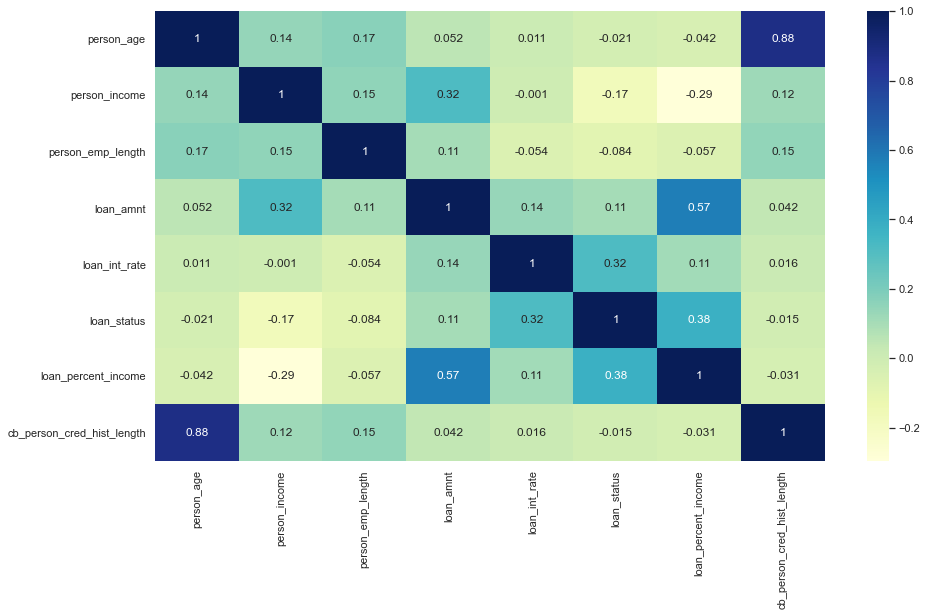

In [181]:
df.corr()


sns.heatmap(df.corr(), annot=True, cmap="YlGnBu").figsize=(20,20)



## Prepping the Data for ML

### ML

* TTS the data 75 / 25
* after TTS, OHE on the cat vars, normalize or standardize depending on what's appropriate
* fit transformations to the Training data, then fit_transform on the Testing data
* suitable models: Logistic Regression (Lasso, Ridge), RF classifier, GB classifier, KNN classifier, SVM classifier
    * which ones are most suitable?
    * which ones produce usable probabilities?
* evaluation
* tuning - Grid Search using Kfold-CV

In [245]:
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
# from sklearn.cluster import KMeans
# from yellowbrick.cluster import InterclusterDistance
# from sklearn.dummy import DummyClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# from yellowbrick.model_selection import FeatureImportances
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline



In [183]:
# person age - leave as is
# person income - standardize
# person home ownersip - ohe
# person emp length - leave as is
# loan intent - ohe
# loan grade - ohe
# loan amnt - normalize
# loan_int_rate - standardize
# loan status - target
# loan percent income - leave as is or standardize?
# default on file - ohe
# cred length - leave as is

# are these variables redundant?
# int group - ohe
# age group - ohe
# risk group - ohe
# income group - ohe
# loan size - ohe
# loan to income grouping - ohe

In [184]:
y = df['loan_status'].ravel()
print(len(y))
print(y[:10])

X = df.drop('loan_status', axis = 1)

X.head(5)

32574
[0 1 1 1 1 1 1 1 1 1]


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size,loan_to_income_grouping
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,10% - 15%,under 25,low risk,under 65k,under 10k,10% - 25%
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,10% - 15%,25 - 35,medium risk,under 65k,under 10k,> 25%
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,over 15%,under 25,medium risk,65k - 125k,> 20k,> 25%
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,10% - 15%,under 25,medium risk,under 65k,> 20k,> 25%
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2,under 10%,under 25,low risk,under 65k,under 10k,> 25%


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, stratify = y, random_state=3)

In [186]:
print(len(X_train))
print(len(y_train))

print(len(X_test))
print(len(y_test))

24430
24430
8144
8144


In [187]:
collections.Counter(y_train)
pd.DataFrame(y_train).value_counts(normalize = True)

0    0.781826
1    0.218174
dtype: float64

In [188]:
collections.Counter(y_test)
pd.DataFrame(y_test).value_counts(normalize = True)

0    0.781803
1    0.218197
dtype: float64

In [189]:
# applying transformations to X_train
# apply transformations to X_test after fitting on X_train

# person age - leave as is
# person income - standardize
# person home ownersip - ohe
# person emp length - leave as is
# loan intent - ohe
# loan grade - ohe
# loan amnt - normalize
# loan_int_rate - standardize
# loan status - target
# loan percent income - leave as is or standardize?
# default on file - ohe
# cred length - leave as is

# are these variables redundant?
# int group - ohe
# age group - ohe
# risk group - ohe
# income group - ohe
# loan size - ohe
# loan to income grouping - ohe

In [190]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,int_group,age_group,risk_group,income_group,loan_size,loan_to_income_grouping
32036,40,42996,OWN,15.000000,EDUCATION,D,15000,16.000000,0.35,Y,17,over 15%,over 35,medium risk,under 65k,10k - 20k,> 25%
25243,27,82000,MORTGAGE,11.000000,PERSONAL,A,10000,7.510000,0.12,N,9,under 10%,25 - 35,low risk,65k - 125k,10k - 20k,10% - 25%
14989,24,120000,OWN,8.000000,PERSONAL,D,15000,15.280000,0.13,N,3,over 15%,under 25,medium risk,65k - 125k,10k - 20k,10% - 25%
14474,24,108000,MORTGAGE,8.000000,DEBTCONSOLIDATION,A,4200,11.011695,0.04,N,3,10% - 15%,under 25,low risk,65k - 125k,under 10k,under 10%
18508,33,12000,RENT,4.789686,EDUCATION,A,1000,7.880000,0.08,N,7,under 10%,25 - 35,low risk,under 65k,under 10k,under 10%


In [191]:
cats = X_train[['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'int_group', 'age_group', 
               'risk_group', 'income_group', 'loan_size', 'loan_to_income_grouping']]

cats_cols = list(cats.columns)
# cats_cols

# discs = X_train.drop(cats_cols, axis = 1)

# discs

In [192]:
test_cats = X_test[cats_cols]

test_cats

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,int_group,age_group,risk_group,income_group,loan_size,loan_to_income_grouping
18788,RENT,VENTURE,C,Y,10% - 15%,25 - 35,medium risk,65k - 125k,under 10k,under 10%
29379,RENT,HOMEIMPROVEMENT,B,N,10% - 15%,over 35,low risk,65k - 125k,10k - 20k,10% - 25%
1692,MORTGAGE,HOMEIMPROVEMENT,A,N,under 10%,under 25,low risk,under 65k,under 10k,under 10%
15567,OWN,HOMEIMPROVEMENT,D,N,10% - 15%,under 25,medium risk,under 65k,under 10k,> 25%
29623,MORTGAGE,PERSONAL,A,N,under 10%,over 35,low risk,under 65k,under 10k,10% - 25%
...,...,...,...,...,...,...,...,...,...,...
21174,RENT,VENTURE,C,Y,10% - 15%,25 - 35,medium risk,65k - 125k,under 10k,under 10%
14009,OWN,PERSONAL,D,N,over 15%,under 25,medium risk,65k - 125k,> 20k,> 25%
15035,MORTGAGE,PERSONAL,C,N,10% - 15%,25 - 35,medium risk,65k - 125k,10k - 20k,under 10%
23602,RENT,MEDICAL,A,N,under 10%,25 - 35,low risk,under 65k,under 10k,10% - 25%


In [193]:
cols_to_standardize = X_train[['person_income', 'loan_int_rate', 'loan_percent_income']]

stands = list(cols_to_standardize.columns)

cols_to_normalize = X_train[['loan_amnt']]

norms = list(cols_to_normalize.columns)

In [194]:
# Set up scaler
scaler = StandardScaler().fit(X_train.loc[:, stands])

# Scale original data
X_train.loc[:, stands] = scaler.transform(X_train.loc[:, stands])

# Scale new data 
# X_test[stands] = scaler.transform(X_test[stands])
X_test.loc[:, stands] = scaler.transform(X_test.loc[:, stands])



/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [195]:
# X_test
# X_train

In [196]:
min_max_scaler = MinMaxScaler().fit(X_train.loc[:, norms])

X_train.loc[:, norms] = min_max_scaler.transform(X_train.loc[:, norms])

X_test.loc[:, norms] = min_max_scaler.transform(X_test.loc[:, norms])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [197]:
# X_train
# X_test

In [198]:
# cats

In [199]:
#using get dummies

# X_train.info()

# pd.get_dummies(X_train, drop_first = False)

# pd.get_dummies(X_train)

X_train = pd.get_dummies(X_train)

X_test = pd.get_dummies(X_test)

# X_train

# X_test

In [200]:
# need to fix the OHE code

# cats_cols

# enc = OneHotEncoder(handle_unknown = 'ignore').fit(X_train.loc[:, cats_cols])

# enc = OneHotEncoder(handle_unknown = 'ignore')

# enc = OneHotEncoder(handle_unknown = 'ignore').fit_transform(cats)




# encoder=OneHotEncoder(inputCol="GenderIndex",outputCol="gendervec")
# data = encoder.transform(data)



# cats = enc.fit(cats)

# cats = enc.transform(cats)

# enc = enc.fit(X_train.loc[:, cats_cols])

# output_data = temp.reshape(-1, 1)

# X_train.loc[:, cats_cols] = X_train.loc[:, cats_cols].reshape(-1, 1)

# X_train.loc[:, cats_cols] = enc.fit_transform(X_train.loc[:, cats_cols])

# X_test.loc[:, cats_cols] = enc.transform(X_test.loc[:, cats_cols])

In [201]:
# X_train
# X_test

In [202]:
X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,int_group_10% - 15%,int_group_over 15%,int_group_under 10%,age_group_25 - 35,age_group_over 35,age_group_under 25,risk_group_high risk,risk_group_low risk,risk_group_medium risk,income_group_65k - 125k,income_group_> 125k,income_group_under 65k,loan_size_10k - 20k,loan_size_> 20k,loan_size_under 10k,loan_to_income_grouping_10% - 25%,loan_to_income_grouping_> 25%,loan_to_income_grouping_under 10%
32036,40,-0.429603,15.000000,0.420290,1.623907,1.700693,17,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0
25243,27,0.302822,11.000000,0.275362,-1.126027,-0.467322,9,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
14989,24,1.016394,8.000000,0.420290,1.390697,-0.373060,3,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0
14474,24,0.791056,8.000000,0.107246,0.008181,-1.221414,3,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
18508,33,-1.011653,4.789686,0.014493,-1.006183,-0.844368,7,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1


In [203]:
X_train.tail()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,int_group_10% - 15%,int_group_over 15%,int_group_under 10%,age_group_25 - 35,age_group_over 35,age_group_under 25,risk_group_high risk,risk_group_low risk,risk_group_medium risk,income_group_65k - 125k,income_group_> 125k,income_group_under 65k,loan_size_10k - 20k,loan_size_> 20k,loan_size_under 10k,loan_to_income_grouping_10% - 25%,loan_to_income_grouping_> 25%,loan_to_income_grouping_under 10%
26432,27,0.188369,0.0,0.507246,2.032025,0.286770,8,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
337,24,1.266145,6.0,0.710145,-0.199665,0.192509,2,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
18132,35,-0.955318,0.0,0.041304,0.600374,-0.373060,6,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0
26302,34,0.265266,6.0,0.391304,1.063555,0.003986,7,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
3278,25,-0.831382,3.0,0.089855,0.001154,0.003986,4,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0


In [204]:
display(X_train.shape)

display(X_test.shape)

(24430, 44)

(8144, 44)

In [205]:
# ### Correct


# enc = OneHotEncoder(handle_unknown = 'ignore')
# enc.fit(cats)

# enc.transform(cats).toarray()
# #array([[1., 0., 0.],
# #       [0., 1., 0.],
# #       [1., 0., 0.],
# #       [0., 0., 1.]])

# cats_ohe = enc.transform(cats).toarray()

# pd.DataFrame(cats_ohe)

# enc.transform(test_cats).toarray()

## Using ML to Predict Defaults

### Need to redo this section

In [206]:
# need a probability output
# logistic regression
# gradient boost
# xg boost (need to install library?)

# random forest?
# bayes?



In [207]:
# data

display(X_train.shape)
display(X_test.shape)

display(y_train.shape)
display(y_test.shape)

(24430, 44)

(8144, 44)

(24430,)

(8144,)

In [208]:
y_train = y_train.ravel()
y_test = y_test.ravel()

display(y_train.shape)
display(y_test.shape)

(24430,)

(8144,)

In [209]:
# logistic regression

In [248]:
log_clf = LogisticRegression(random_state=32, solver='liblinear')

# log_clf.fit(X_train, y_train)
log_clf = log_clf.fit(X_train, y_train)
training_preds = log_clf.predict(X_train)

display(training_preds[:10])
y_train[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [249]:
scorer = make_scorer(f1_score)


print('The training F1 Score is', f1_score(training_preds, y_train))
print(accuracy_score(y_train, training_preds))

The training F1 Score is 0.6571397872569035
0.86938190749079


In [256]:
test_preds = log_clf.predict(X_test)

display(test_preds[:10])
display(y_test[:10])

print('The testing F1 Score is', f1_score(test_preds, y_test))
print(accuracy_score(y_test, test_preds))

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0])

The testing F1 Score is 0.6429258902791145
0.8633349705304518


In [254]:
print(confusion_matrix(y_train, training_preds))
print(classification_report(y_train, training_preds))

[[18181   919]
 [ 2272  3058]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     19100
           1       0.77      0.57      0.66      5330

    accuracy                           0.87     24430
   macro avg       0.83      0.76      0.79     24430
weighted avg       0.86      0.87      0.86     24430



In [255]:
print(confusion_matrix(y_test, test_preds))
print(classification_report(y_test, test_preds))

[[6029  338]
 [ 775 1002]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6367
           1       0.75      0.56      0.64      1777

    accuracy                           0.86      8144
   macro avg       0.82      0.76      0.78      8144
weighted avg       0.86      0.86      0.86      8144



In [234]:
confusion_matrix(y_train, training_preds)

array([[18181,   919],
       [ 2272,  3058]])

In [235]:
confusion_matrix(y_train, training_preds, normalize = 'true')

array([[0.95188482, 0.04811518],
       [0.42626642, 0.57373358]])

In [236]:
confusion_matrix(y_train, training_preds, normalize = 'pred')

array([[0.88891605, 0.2310787 ],
       [0.11108395, 0.7689213 ]])

In [237]:
confusion_matrix(y_train, training_preds, normalize = 'all')

array([[0.74420794, 0.03761768],
       [0.09300041, 0.12517397]])

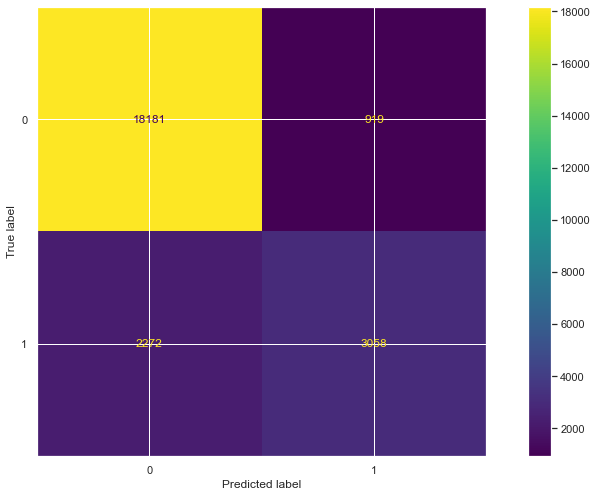

In [238]:
plot_confusion_matrix(log_clf, X_train, y_train)

In [239]:
scorer = make_scorer(f1_score)
all_accuracies = cross_val_score(estimator=log_clf, X=X_train, y=y_train, cv=10)

log_clf.fit(X_train, y_train)

log_clf_preds = log_clf.predict(X_train)

print('The training F1 Score is', f1_score(log_clf_preds, y_train))



log_clf_test = log_clf.predict(X_test)
print('The testing F1 Score is', f1_score(log_clf_test, y_test))



The training F1 Score is 0.6571397872569035
The testing F1 Score is 0.6429258902791145


In [240]:
log_clf = LogisticRegression(random_state=22)


log_params = {"solver" : ["liblinear", "entropy", "saga"],
             "penalty" : ['l1', 'l2', 'elasticnet'],
             "C": [.001, .01, .1, .25, .33, .5, .75, .9],
             "class_weight" : ['None', 'balanced']}

In [246]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  

pipe.score(X_test, y_test)  

0.8634577603143418

In [ ]:
pipe_preds = pipe.predict(X_test)

print('The F1 Score is', f1_score(pipe_preds, y_test))

In [243]:
scorer_log = make_scorer(f1_score)

all_accuracies_log = cross_val_score(estimator=log_clf, X=X_train, y=y_train, cv=10)

all_accuracies_log

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

array([0.86369218, 0.87351617, 0.87883749, 0.87556283, 0.86819484,
       0.87065084, 0.85427753, 0.86655751, 0.85632419, 0.87106017])

In [225]:
all_accuracies_log.mean()

0.867867376176832

In [226]:
all_accuracies_log.std()

0.007527272706654197

In [ ]:

 

grid_obj_log = GridSearchCV(estimator=log_clf,
                     param_grid=log_params,
                     scoring=scorer_log,
                     cv=10)

grid_fit_log = grid_obj_log.fit(X_train, y_train)

grid_fit_log

In [263]:

gsv = GridSearchCV(cv=10, estimator=LogisticRegression(random_state=32),
             param_grid = {"solver" : ["liblinear", "saga"],
             "penalty" : ['l1', 'l2', 'elasticnet'],
             "C": [.001, .01, .1, .25, .33, .5, .75, .9],
             "class_weight" : ['None', 'balanced']},
             scoring=make_scorer(f1_score))


gsv.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1360, in fit
    sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 931, in _fit_liblinear
    y=y)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/class_weight.py", line 64, in compute_class_weight
    " got: %r" % class_weight)
ValueError: class_weight must be dict, 'balanced', or None

KeyboardInterrupt: 

In [ ]:
best_clf_log = gsv.best_estimator_
best_parameters_log = gsv.best_params_

print(best_parameters_log)


In [ ]:
best_clf_log

In [ ]:
best_result_log = gsv.best_score_
print(best_result_log)

In [ ]:
best_result_log.fit(X_train, y_train)

In [ ]:
best_train_predictions_log = best_clf_log.predict(X_train)

print('The training F1 Score is', f1_score(best_train_predictions_tree, y_train))

In [ ]:
best_test_predictions_log = best_clf_tree.predict(X_test)

In [ ]:
print('The testing F1 Score is', f1_score(best_test_predictions_tree, y_test))

In [ ]:
best_clf_tree.feature_importances_

In [ ]:
viz = FeatureImportances(best_clf_tree)
viz.fit(X_test, y_test)
viz.show()

In [ ]:
# gradient boost

In [ ]:
# random forest

In [ ]:
# bayes

## Evaluating the ML Results

## Evaluating the Credit Risk
### Based on the ML Results
* What are the PD, LGD, EAD values? Conversely, what's our expected recovery rate/amount?

* How does changing our acceptance rate of bad loans change our results?

* How does changing the threshold value of probability of default affect our results?

* Given our final predictions, acceptance rates, and threshold values, what patterns / insights do we see relative to credit risk amongst the variables?



## Conclusion

### Final Recommendations

### Conclusions